###                                 A simple analysis of swear words used in Tarantino movies

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')

# Wordcloud
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('tarantino.csv')

In [3]:
df.word = df.word.astype(str)

In [4]:
# Remove all Nan's
df = df[df.word != 'nan']

In [5]:
df.word.value_counts(normalize=True)

fucking          0.238850
shit             0.129695
fuck             0.125000
n-word           0.105047
ass              0.082160
goddamn          0.066315
motherfucker     0.041080
bitch            0.037559
hell             0.026408
damn             0.021714
motherfucking    0.015845
fucked           0.014671
bullshit         0.008803
motherfuckers    0.008803
dick             0.008216
pussy            0.006455
asshole          0.005869
bastard          0.005869
bitches          0.005282
fucker           0.004695
assholes         0.002934
negro            0.002934
dicks            0.002934
shitty           0.002347
asses            0.002347
fucks            0.001761
damned           0.001761
shithead         0.001761
cocksucker       0.001174
wetback          0.001174
cunt             0.001174
horseshit        0.001174
shitload         0.001174
japs             0.001174
gooks            0.001174
squaw            0.000587
shitless         0.000587
horeshit         0.000587
jew (verb)  

#### Generate Wordcloud

In [6]:
# Add stopwords
stopwords = set(STOPWORDS)
stopwords.add("word")
stopwords.add("Length")
stopwords.add("dtype")
stopwords.add("object")

In [7]:
wc = WordCloud(background_color='white',
               stopwords=stopwords,
               max_words=20,
               max_font_size=45, 
               random_state=42)
wc.generate_from_frequencies(dict(df.word.value_counts()))

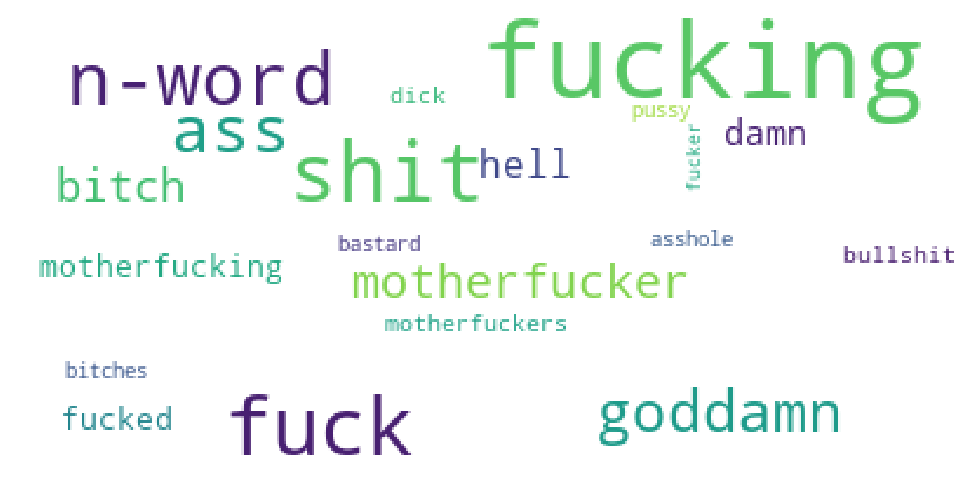

In [8]:
print(wc)
#fig = plt.figure(1)
plt.figure(figsize=(15, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('tarantoino_wc.jpg')

In [9]:
df.movie.unique()

array(['Reservoir Dogs', 'Pulp Fiction', 'Kill Bill: Vol. 1',
       'Kill Bill: Vol. 2', 'Inglorious Basterds', 'Django Unchained',
       'Jackie Brown'], dtype=object)

In [10]:
len(df.minutes_in)

1704

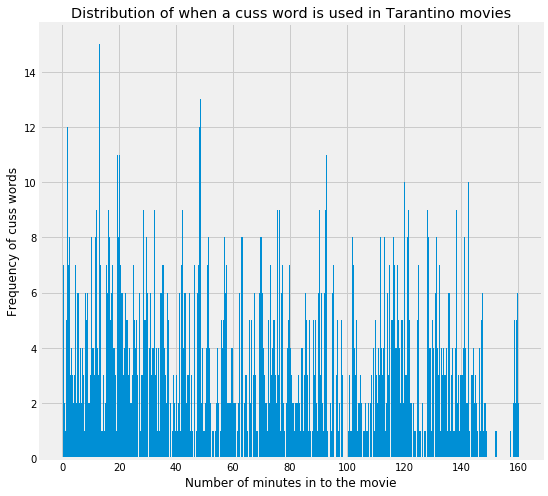

In [11]:
df.minutes_in.hist(bins=500, figsize=(8, 8))
plt.xlabel("Number of minutes in to the movie")
plt.ylabel("Frequency of cuss words")
plt.title("Distribution of when a cuss word is used in Tarantino movies")
plt.show()

Text(0,0.5,'Number of cuss words')

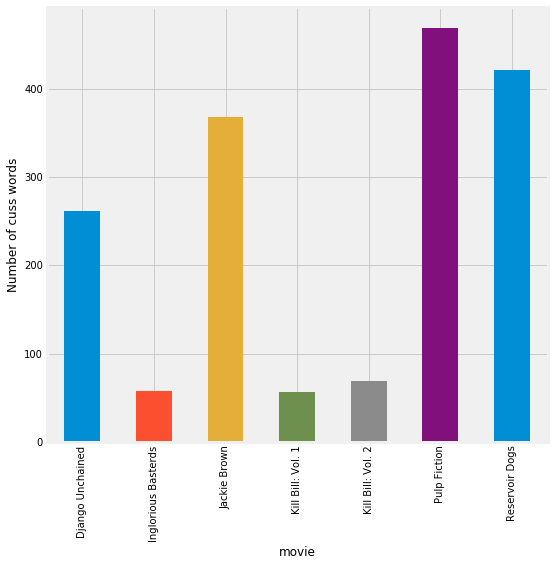

In [12]:
df.groupby(df.movie)['word'].count().plot(kind='bar', figsize=(8, 8))
plt.ylabel('Number of cuss words')

Interestingly enough, Tarantino seems to have tamed down his use of swear words with time. 